In [313]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve, accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OrdinalEncoder, LabelEncoder
from sklearn.preprocessing import binarize
%matplotlib inline

In [231]:
df = pd.read_csv('bank-full.csv', sep=';')
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


## EDA

In [232]:
df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


In [233]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [234]:
df.isna().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

In [235]:
df.duplicated().sum()

0

In [236]:
# df = df[['default', 'housing', 'loan', 'campaign', 'pdays', 'previous', 'y']]
# df`
df['month'] = df['month'].map({'may': 5, 'jun': 6, 'jul': 7, 'aug': 8, 'oct': 10, 'nov': 11, 'dec': 12, 'jan': 1, 'feb': 2,
       'mar': 3, 'apr': 4, 'sep': 9})

In [237]:
df['month'].unique()

array([ 5,  6,  7,  8, 10, 11, 12,  1,  2,  3,  4,  9], dtype=int64)

In [238]:
oe = OrdinalEncoder()
le = LabelEncoder()
df[['job','marital','education','default', 'housing','loan','contact', 'poutcome']] = oe.fit_transform(df[['job','marital','education','default', 'housing','loan','contact', 'poutcome']])
df['y'] = le.fit_transform(df['y'])

## Scaling the data

In [239]:
ss = StandardScaler()
xtrain = ss.fit_transform(xtrain)
xtrain = pd.DataFrame(xtrain, columns=x.columns)
xtrain

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
0,1.042859,-0.100186,-0.277860,1.040261,-0.135174,-0.442329,-1.120834,-0.435049,-0.711345,0.745027,0.767645,-0.101233,-0.247455,-0.410038,-0.242523,0.443781
1,0.854392,-1.322693,1.363703,-0.297202,-0.135174,-0.335576,0.892193,-0.435049,1.519852,1.466161,-0.478093,-0.907828,-0.566242,-0.410038,-0.242523,0.443781
2,0.383224,-1.017066,-0.277860,-1.634664,-0.135174,-0.345280,0.892193,-0.435049,-0.711345,1.586350,-2.139078,-0.213691,-0.566242,2.211476,1.011932,-2.596120
3,-0.276411,1.427949,-0.277860,-0.297202,-0.135174,-0.433595,0.892193,-0.435049,1.519852,-1.538564,-0.062847,0.565759,0.390119,-0.410038,-0.242523,0.443781
4,-0.936046,0.816695,1.363703,-0.297202,-0.135174,-0.155388,-1.120834,-0.435049,-0.711345,1.706539,-2.139078,0.654949,-0.566242,-0.410038,-0.242523,0.443781
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36163,0.854392,1.427949,-0.277860,1.040261,-0.135174,0.149668,-1.120834,-0.435049,-0.711345,-0.216485,-0.478093,0.232263,0.071332,-0.410038,-0.242523,0.443781
36164,-0.653346,-0.100186,-1.919423,1.040261,-0.135174,-0.271523,0.892193,-0.435049,-0.711345,0.144082,-0.893339,-0.097356,-0.247455,-0.410038,-0.242523,0.443781
36165,0.665925,-0.100186,-0.277860,1.040261,-0.135174,0.913442,-1.120834,-0.435049,1.519852,0.624838,-0.478093,0.406766,1.027693,-0.410038,-0.242523,0.443781
36166,0.383224,-1.322693,-0.277860,2.377723,-0.135174,0.134464,-1.120834,-0.435049,1.519852,0.504649,-0.062847,-0.958241,2.621628,-0.410038,-0.242523,0.443781


In [240]:
xtest = ss.transform(xtest)
xtest = pd.DataFrame(xtest, columns=x.columns)
xtest

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
0,0.100523,-1.017066,-0.277860,-1.634664,-0.135174,0.372557,0.892193,-0.435049,1.519852,-0.096296,-0.478093,0.015102,0.390119,-0.410038,-0.242523,0.443781
1,-0.370645,1.427949,-0.277860,-0.297202,-0.135174,0.272273,-1.120834,-0.435049,1.519852,0.504649,-0.062847,-0.353294,-0.247455,-0.410038,-0.242523,0.443781
2,-0.841813,-1.322693,-0.277860,-0.297202,-0.135174,-0.143743,0.892193,-0.435049,-0.711345,0.144082,-0.893339,2.175071,0.390119,-0.410038,-0.242523,0.443781
3,1.137093,-1.017066,-0.277860,-1.634664,-0.135174,-0.343340,-1.120834,-0.435049,-0.711345,1.466161,0.352399,0.503713,0.071332,1.411013,0.175629,-0.569519
4,-0.841813,1.427949,1.363703,1.040261,-0.135174,-0.359191,0.892193,-0.435049,1.519852,-1.658753,-0.062847,-0.291249,0.708906,-0.410038,-0.242523,0.443781
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9038,1.419793,-0.405812,-0.277860,-1.634664,-0.135174,-0.442329,-1.120834,-0.435049,-0.711345,1.225783,0.767645,-0.605355,-0.247455,-0.410038,-0.242523,0.443781
9039,-0.747579,0.816695,1.363703,-0.297202,-0.135174,0.822539,0.892193,-0.435049,-0.711345,0.384460,2.013383,1.620537,-0.247455,-0.410038,-0.242523,0.443781
9040,0.288990,2.039202,-0.277860,2.377723,-0.135174,-0.016285,-1.120834,-0.435049,0.404253,1.826728,0.352399,0.720873,1.027693,-0.410038,-0.242523,0.443781
9041,-0.936046,-0.100186,1.363703,1.040261,-0.135174,-0.343663,0.892193,-0.435049,1.519852,1.466161,-0.478093,0.150828,3.577989,-0.410038,-0.242523,0.443781


## Splitting the data

In [241]:
x = df.iloc[:, :-1]
y = df.iloc[:,-1]
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.2, random_state=1)

## Model building

In [302]:
lr = LogisticRegression()
lr.fit(xtrain, ytrain)
y_pred = lr.predict(xtest)
y_pred[:20]

C:\Users\rasam\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


array([0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [303]:
confusion_matrix(ytest, y_pred)

array([[7846,  147],
       [ 870,  180]], dtype=int64)

In [304]:
print(classification_report(ytest, y_pred))

              precision    recall  f1-score   support

           0       0.90      0.98      0.94      7993
           1       0.55      0.17      0.26      1050

    accuracy                           0.89      9043
   macro avg       0.73      0.58      0.60      9043
weighted avg       0.86      0.89      0.86      9043



#### We can see that the recall score is very low for 1, so we need to increase the recall score for 1

### Probablities

In [306]:
prob = lr.predict_proba(xtest)
prob = prob[:, 1]
prob

array([0.02905047, 0.06666227, 0.30551245, ..., 0.04857116, 0.00150762,
       0.08911953])

## Plotting the ROC curve and calculating the AUC

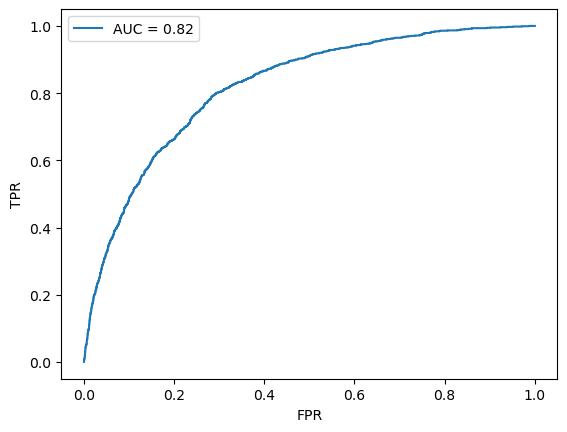

In [307]:
auc = roc_auc_score(ytest, prob)

fpr, tpr, thresh = roc_curve(ytest, prob)
plt.plot(fpr, tpr, label=f'AUC = {round(auc, 3)}')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.legend()

## Selecting the threshold with the best accuracy

In [308]:
acc = []
for i in thresh:
    y_pred = np.where(prob > i, 1, 0)
    acc.append(accuracy_score(ytest, y_pred))

In [310]:
acc_df = pd.DataFrame({'Accuracy': acc, 'Threshold': thresh})
acc_df['Threshold'] = acc_df["Threshold"].apply(lambda x: round(x, 4))
acc_df

,Accuracy,Threshold
0,0.883888,1.9999
1,0.883888,0.9999
2,0.883667,0.9967
3,0.883556,0.9947
4,0.883667,0.9945
...,...,...
1542,0.141435,0.0036
1543,0.141325,0.0036
1544,0.127613,0.0008
1545,0.127502,0.0008


In [311]:
acc_df = acc_df.sort_values(by='Accuracy', ascending=False)
acc_df

,Accuracy,Threshold
133,0.887869,0.5540
128,0.887869,0.5672
146,0.887758,0.5225
143,0.887758,0.5292
127,0.887758,0.5673
...,...,...
1542,0.141435,0.0036
1543,0.141325,0.0036
1544,0.127613,0.0008
1545,0.127502,0.0008


In [388]:
final_y = binarize([prob], threshold=0.24)[0]
final_y[:20]

array([0., 0., 1., 0., 0., 0., 0., 0., 0., 1., 0., 1., 0., 0., 0., 0., 0.,
       0., 0., 0.])

In [389]:
print(classification_report(ytest, final_y))

              precision    recall  f1-score   support

           0       0.93      0.91      0.92      7993
           1       0.40      0.44      0.42      1050

    accuracy                           0.86      9043
   macro avg       0.66      0.68      0.67      9043
weighted avg       0.86      0.86      0.86      9043



### As we can see that there is no improvement in accuracy and recall value, we will try to get the best recall value and increase f1-score 

In [390]:
final_y = binarize([prob], threshold=0.259)[0]
print(classification_report(ytest, final_y))

              precision    recall  f1-score   support

           0       0.92      0.92      0.92      7993
           1       0.41      0.41      0.41      1050

    accuracy                           0.86      9043
   macro avg       0.67      0.66      0.67      9043
weighted avg       0.86      0.86      0.86      9043

